In [5]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
# Draw the lines represented in the hough accumulator on the original image
def drawhoughLinesOnImage(image, houghLines):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b)) # (r*cos(theta)-1000 * sin(theta))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0), 2)  #create a line 

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

#  HoughLine() 

# image: Output of the edge detector. It should be a grayscale image.
# lines: A vector that will store the parameters  of the detected lines
# rho: The resolution of the parameter in pixels. We use 1 pixel.
# theta: The resolution of the parameter in radians. We use 1 degree (CV_PI/180)
# threshold: The minimum number of intersections to “detect” a line
# srn and stn: Default parameters to zero.
# minLinLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
# maxLineGap: The maximum gap between two points to be considered in the same line.



In [7]:
image = cv2.imread("./images/road.jpg") # load image in grayscale

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 120)


# Detect points that form a line
dis_reso = 1        # Distance resolution in pixels of the Hough grid
theta = np.pi /180  # Angular resolution in radians of the Hough grid
threshold = 170     # minimum no of votes

houghLines = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)

houghLinesImage = np.zeros_like(image) # create and empty image


drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
orginalImageWithHoughLines = blend_images(houghLinesImage,image) # add two images together, using image blending

In [8]:
edgeImage2 = cv2.Canny(blurredImage, 50, 120)
img = cv2.imread("./images/road.jpg") # load image in grayscale

lines = cv2.HoughLinesP(edgeImage2, 1, np.pi/180, 30, maxLineGap=250)
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)

(-0.5, 863.5, 319.5, -0.5)

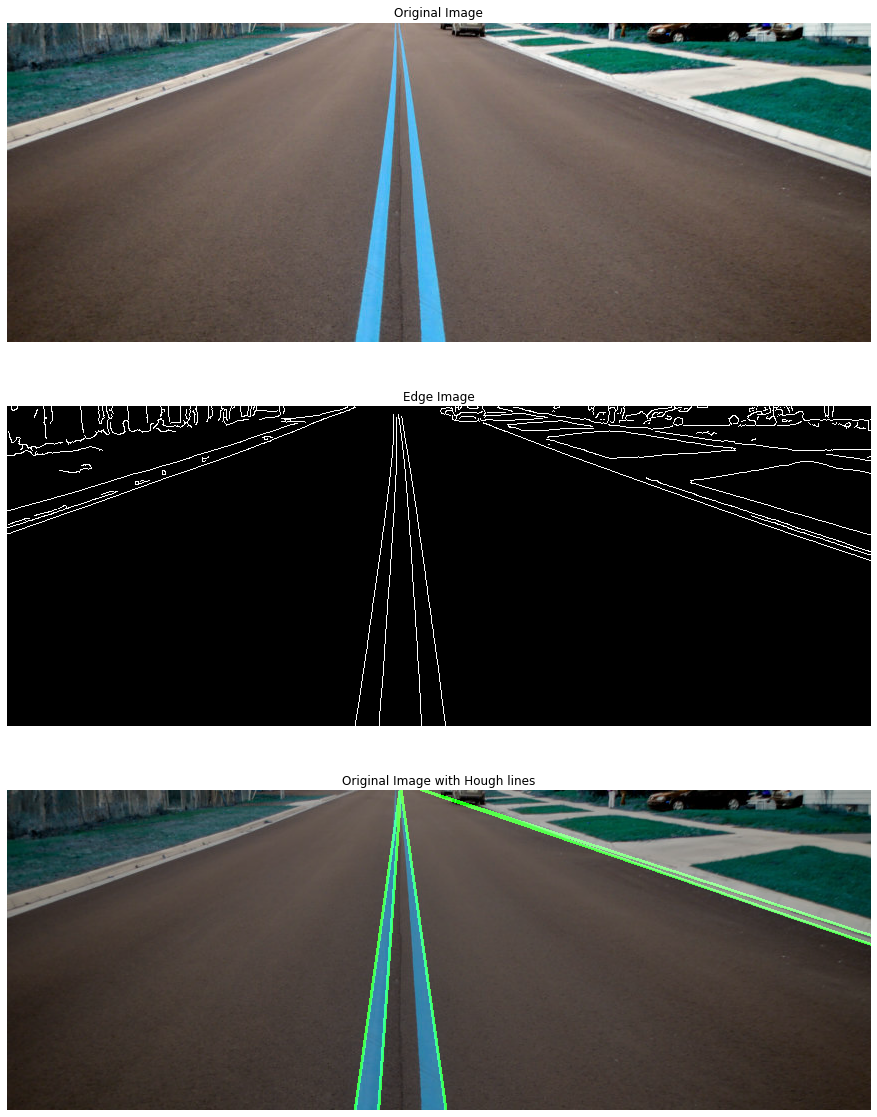

In [14]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edgeImage, cmap='gray')
ax2.set_title('Edge Image')
ax2.axis('off')

ax3.imshow(orginalImageWithHoughLines, cmap='gray')
ax3.set_title("Original Image with Hough lines")
ax3.axis('off')

# ax4.imshow(img, cmap='gray')
# ax4.set_title("Original Image with Hough lines probabilistics")
# ax4.axis('off')

In [5]:
image2 = cv2.imread("./images/line-detection-3.jpg") # load image in grayscale

gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 120)

# Detect points that form a line
dis_reso = 1        # Distance resolution in pixels of the Hough grid
theta = np.pi / 180  # Angular resolution in radians of the Hough grid
threshold = 200     # minimum no of votes

houghLines = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)

houghLinesImage = np.zeros_like(image2) # create and empty image

drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
orginalImageWithHoughLines = blend_images(houghLinesImage,image2) # add two images together, using image blending

(-0.5, 453.5, 339.5, -0.5)

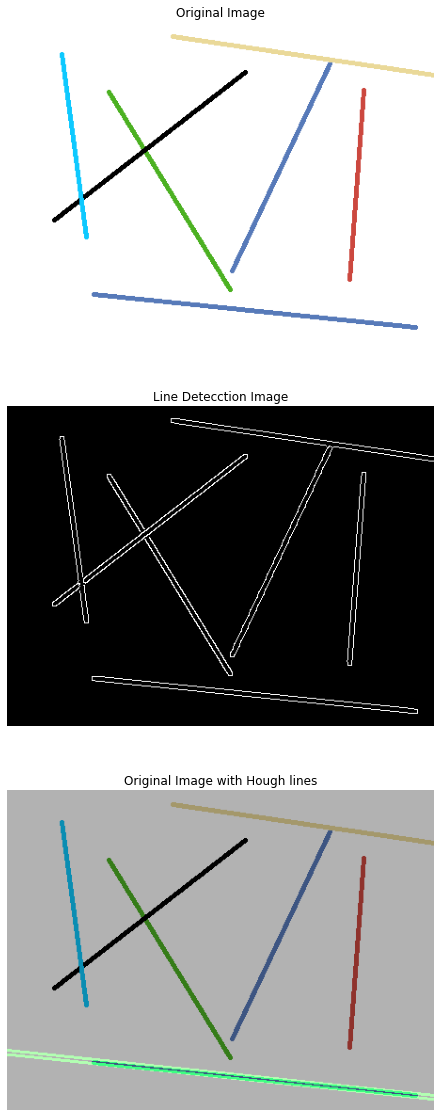

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
ax1.imshow(image2)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edgeImage, cmap='gray')
ax2.set_title('Line Detecction Image')
ax2.axis('off')

ax3.imshow(orginalImageWithHoughLines, cmap='gray')
ax3.set_title("Original Image with Hough lines")
ax3.axis('off')

In [3]:
# probabilistic houghLine transform (won't work)
image3 = cv2.imread("./images/road.jpg")
# grayImage = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# edgeImage = cv2.Canny(grayImage, 50, 150, aperatureSize= 3)
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 150)

# cv2.imshow("edge", edgeImage)

# lines = cv2.HoughLinesP(edgeImage, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

# for line in lines:
#     x1,x2,y1,y2 = line[0]
#     cv2.line(image3,(x1,y1),(x2,y2),(0,255,0),2)
    
# cv2.imshow("image",image3)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()


In [2]:
# probabilistic houghLine transform
img = cv2.imread("./images/line-test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)
    

cv2.imshow("linesEdges", edges)
cv2.imshow("linesDetected", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
# ax1.imshow(img)
# ax1.set_title('Original Image')
# ax1.axis('off')

# ax2.imshow(edges, cmap='gray')
# ax2.set_title('Line Detecction Image')
# ax2.axis('off')

# ax3.imshow(orginalImageWithHoughLines, cmap='gray')
# ax3.set_title("Original Image with Hough lines")
# ax3.axis('off')

(-0.5, 540.5, 309.5, -0.5)

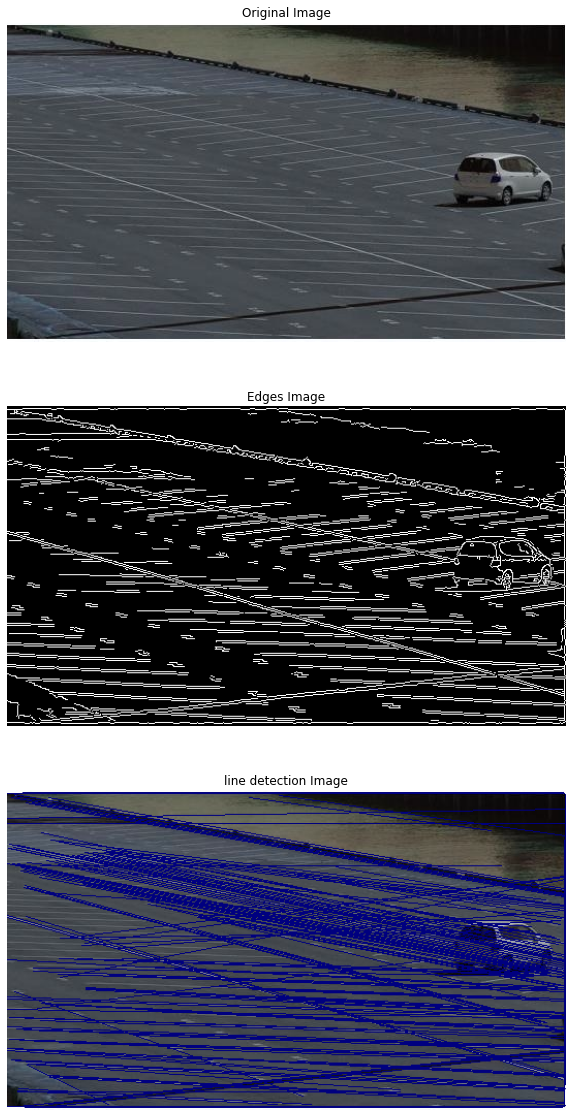

In [12]:
# probabilistic houghLine transform
img = cv2.imread("./images/line-test.jpg")
img0 = cv2.imread("./images/line-test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)
    

# cv2.imshow("linesEdges", edges)
# cv2.imshow("linesDetected", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
ax1.imshow(img0)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Edges Image')
ax2.axis('off')

ax3.imshow(img)
ax3.set_title('line detection Image')
ax3.axis('off')